# Data Analysis: Summaries & Statistics

In [72]:
from google.colab import files
uploaded = files.upload()

import pandas as pd, numpy as np
df = pd.read_csv("Raw_dataset.csv")

import seaborn as sns
import matplotlib.pyplot as plt
import itertools


print("Statistical Summary describe:")
print(df.describe())
print("\n Mean values:")
print(df.mean(numeric_only=True))
print("\n  Standard Deviation (std):")
print(df.std(numeric_only=True))
print("\n Dataset Shape:")
print(f"Rows (instances): {df.shape[0]}, Columns (features): {df.shape[1]}")
print("\n Data Types of Each Column:")
print(df.dtypes)
print("\n  Sample of Dataset:")
print(df.head())

Saving df_test.csv to df_test (4).csv
Statistical Summary describe:
              price     bedrooms        grade  living_in_m2  real_bathrooms  \
count  6.700000e+03  6700.000000  6700.000000   6700.000000     6700.000000   
mean   4.754123e+05     2.240448     2.517612    181.433791        1.665075   
std    2.080475e+05     0.692618     0.971218     68.315420        0.627102   
min    7.500000e+04     1.000000     1.000000     49.238590        1.000000   
25%    3.150000e+05     2.000000     2.000000    129.135170        1.000000   
50%    4.350000e+05     2.000000     2.000000    172.799580        2.000000   
75%    6.021250e+05     3.000000     3.000000    225.754290        2.000000   
max    1.155000e+06     3.000000     5.000000    391.121630        3.000000   

            month  quartile_zone  
count  6700.00000    6700.000000  
mean      6.57194       2.424179  
std       3.09930       1.070753  
min       1.00000       1.000000  
25%       4.00000       2.000000  
50%       

From the analysis, the average house price is about $475,000,
with prices ranging between $75,000 and $1.15 million, showing high variation.
Most houses have 2 bedrooms, 1–2 bathrooms, and an average living area of 181 m².
The average grade is 2.5, indicating medium construction quality,
and most properties are located in zone 2 or 3.
Sales mainly occurred around mid-year (June–July).
Overall, the dataset represents typical medium-sized homes with moderate prices and quality.

# Data Analysis: Visualization (Scatter & Histogram)

In [73]:
# 3️⃣ Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"🔹 Number of numeric columns: {len(numeric_cols)}")
print("Numeric columns:", numeric_cols)
print(f"🔹 Number of categorical columns: {len(categorical_cols)}")
print("Categorical columns:", categorical_cols)

# 4️⃣ Show first 5 rows of data
print("\n🔹 First 5 rows of the dataset:")
display(df.head())

🔹 Number of numeric columns: 7
Numeric columns: ['price', 'bedrooms', 'grade', 'living_in_m2', 'real_bathrooms', 'month', 'quartile_zone']
🔹 Number of categorical columns: 1
Categorical columns: ['date']

🔹 First 5 rows of the dataset:


,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-09-26,305000.0,2,1,False,76.18046,False,False,True,1,False,True,9,2
1,2014-05-14,498000.0,3,2,True,210.88981,False,False,False,2,True,True,5,2
2,2015-03-23,590000.0,2,4,False,262.91549,False,False,False,2,True,False,3,2
3,2014-07-15,775000.0,3,3,False,159.79316,False,False,False,1,True,False,7,3
4,2015-04-14,350000.0,2,1,False,92.90300,False,False,False,1,True,True,4,3


In [74]:
# 3️⃣ Define groups: 3 + 3 + remaining
group1 = numeric_cols[0:3]
group2 = numeric_cols[3:6]
group3 = numeric_cols[6:]  # remaining columns


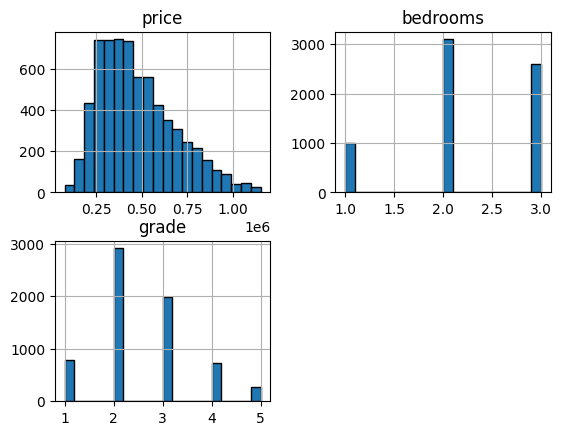

In [75]:
# Group 1
df[group1].hist(bins=20, edgecolor='black')
plt.show()



1. Price:
The price distribution is right-skewed, meaning most houses are priced between 200,000 and 600,000, with fewer expensive properties above 1,000,000.
2. Bedrooms:
Most houses have 2 or 3 bedrooms, while 1-bedroom houses are less common.
 3. Grade:
Houses are mainly rated with grades 2 and 3, while grades 1 and 5 are much less frequent.

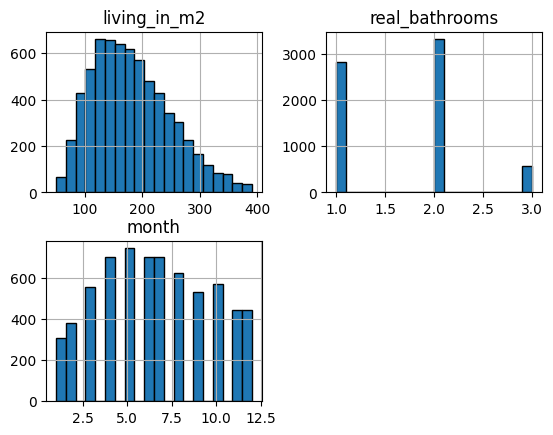

In [76]:
df[group2].hist(bins=20, edgecolor='black')
plt.show()

# 📝 Pause here to write your description for group1 manually


 4. Living_in_m2:
The living area (in square meters) distribution is right-skewed, with most houses around 100–200 m², and a few larger houses above 300 m².
 5. Real_bathrooms:
The majority of houses have 1 or 2 bathrooms, with a smaller number having 3.

6.Month : Sales (or recorded data) occur throughout the year, with a slight increase between months 4 and 8, indicating more activity in mid-year

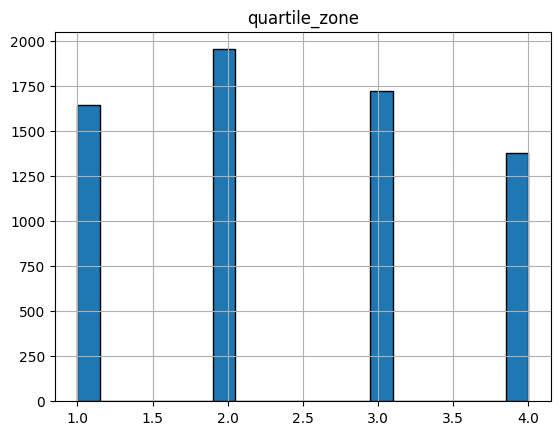

In [77]:
# Group 3
df[group3].hist(bins=20, edgecolor='black')
plt.show()

# 📝 Pause here to write your description for group1 manually


7.
Quartile_zone: The data is fairly balanced across the four quartile zones, though Zone 2 has the highest count and Zone 4 the lowest

In [78]:
pairs = list(itertools.combinations(numeric_cols, 2))



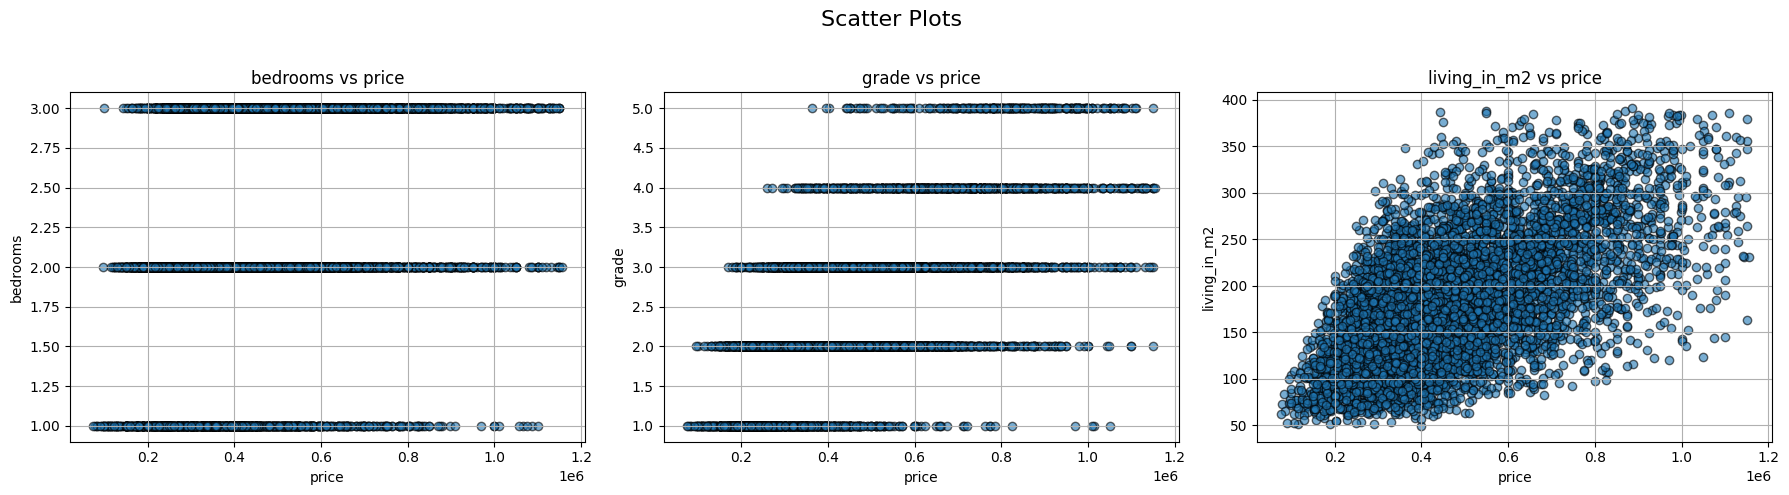

In [79]:

# 3️⃣ Create all pairs for scatter plots
pairs = list(itertools.combinations(numeric_cols, 2))

group1_pairs = pairs[0:3]  # first 3 pairs

fig, axes = plt.subplots(1, len(group1_pairs), figsize=(6*len(group1_pairs), 5))
if len(group1_pairs) == 1:
    axes = [axes]

for ax, (x_col, y_col) in zip(axes, group1_pairs):
    ax.scatter(df[x_col], df[y_col], alpha=0.6, edgecolor='black')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col} vs {x_col}")
    ax.grid(True)

plt.suptitle("Scatter Plots ", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Row1

1. bedrooms vs price:
No strong trend—prices vary widely for each bedroom count. Indicates that number of bedrooms alone doesn’t explain price differences.

2. grade vs price:
Positive correlation—higher grade homes tend to have higher prices, showing quality strongly impacts property value.

3. living_in_m2 vs price:
Strong positive relationship—larger houses (in m²) are consistently priced higher.

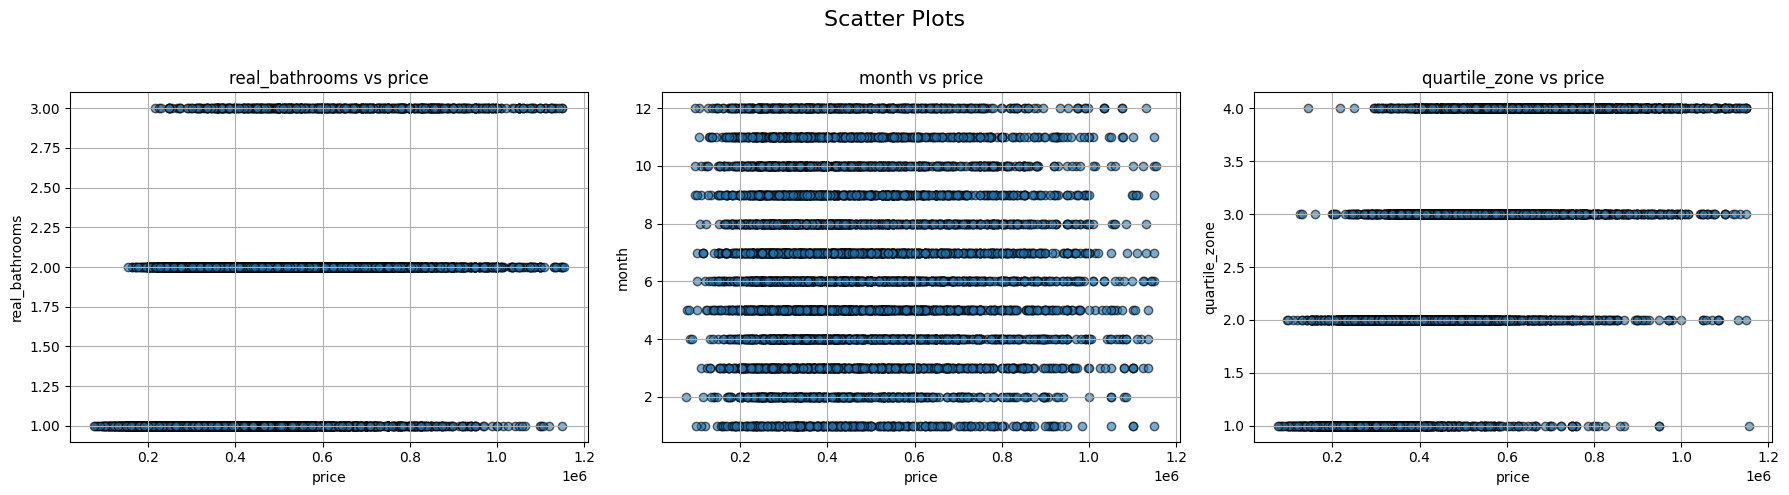

In [80]:
group2_pairs = pairs[3:6]  # next 3 pairs

fig, axes = plt.subplots(1, len(group2_pairs), figsize=(6*len(group2_pairs), 5))
if len(group2_pairs) == 1:
    axes = [axes]

for ax, (x_col, y_col) in zip(axes, group2_pairs):
    ax.scatter(df[x_col], df[y_col], alpha=0.6, edgecolor='black')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col} vs {x_col}")
    ax.grid(True)

plt.suptitle("Scatter Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


ROW 2
1. real_bathrooms vs price:
The number of bathrooms shows little variation with price; most homes cluster around similar bathroom counts regardless of price, suggesting this variable alone isn’t a strong predictor of price.

2. month vs price:
Prices are evenly distributed across months, showing no clear seasonal pattern or correlation between month of sale and property price.

3. quartile_zone vs price:
Different quartile zones show overlapping price ranges, but higher zones might slightly associate with higher prices, though not strongly.

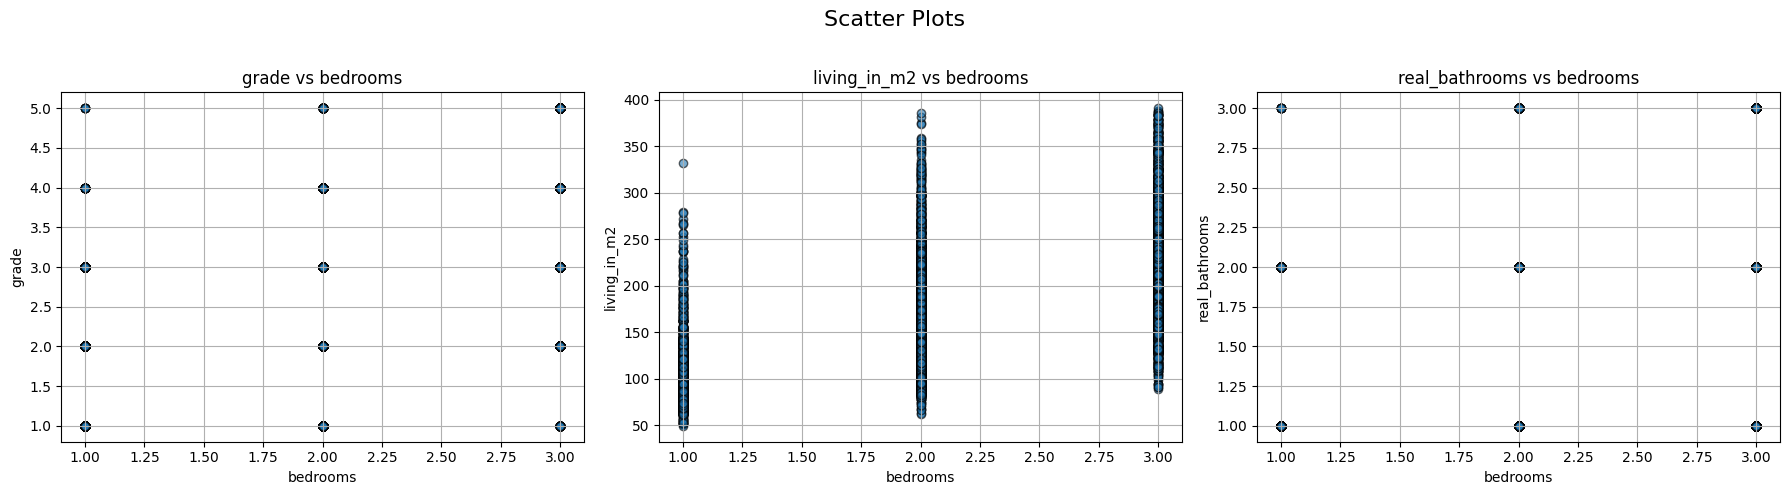

In [81]:
group2_pairs = pairs[6:9]  # next 3 pairs

fig, axes = plt.subplots(1, len(group2_pairs), figsize=(6*len(group2_pairs), 5))
if len(group2_pairs) == 1:
    axes = [axes]

for ax, (x_col, y_col) in zip(axes, group2_pairs):
    ax.scatter(df[x_col], df[y_col], alpha=0.6, edgecolor='black')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col} vs {x_col}")
    ax.grid(True)

plt.suptitle("Scatter Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


ROW 3

1. grade vs bedrooms:
There’s a weak relationship; properties with more bedrooms don’t necessarily have a higher grade, implying size doesn’t directly determine quality rating.

2. living_in_m2 vs bedrooms:
A clear positive correlation appears—larger living areas (in m²) tend to have more bedrooms.

3. real_bathrooms vs bedrooms:
Slight positive trend; more bedrooms usually come with slightly more bathrooms, though variation is limited.

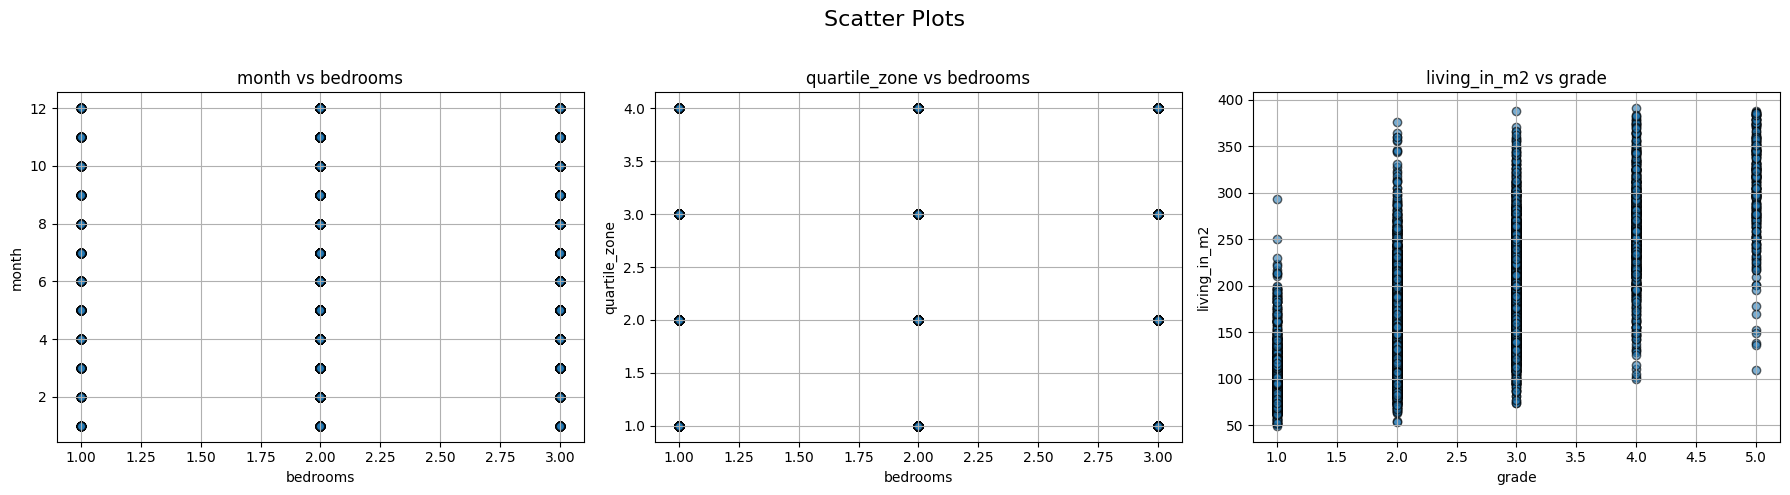

In [82]:
group2_pairs = pairs[9:12]  # next 3 pairs

fig, axes = plt.subplots(1, len(group2_pairs), figsize=(6*len(group2_pairs), 5))
if len(group2_pairs) == 1:
    axes = [axes]

for ax, (x_col, y_col) in zip(axes, group2_pairs):
    ax.scatter(df[x_col], df[y_col], alpha=0.6, edgecolor='black')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col} vs {x_col}")
    ax.grid(True)

plt.suptitle("Scatter Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


ROW 4

1. month vs bedrooms:
Bedrooms are evenly distributed across months—no monthly trend in number of bedrooms sold.

2. quartile_zone vs bedrooms:
Bedrooms appear uniformly spread across quartile zones, showing no clear relationship.

3. living_in_m2 vs grade:
Positive correlation—higher grade properties generally have larger living areas.

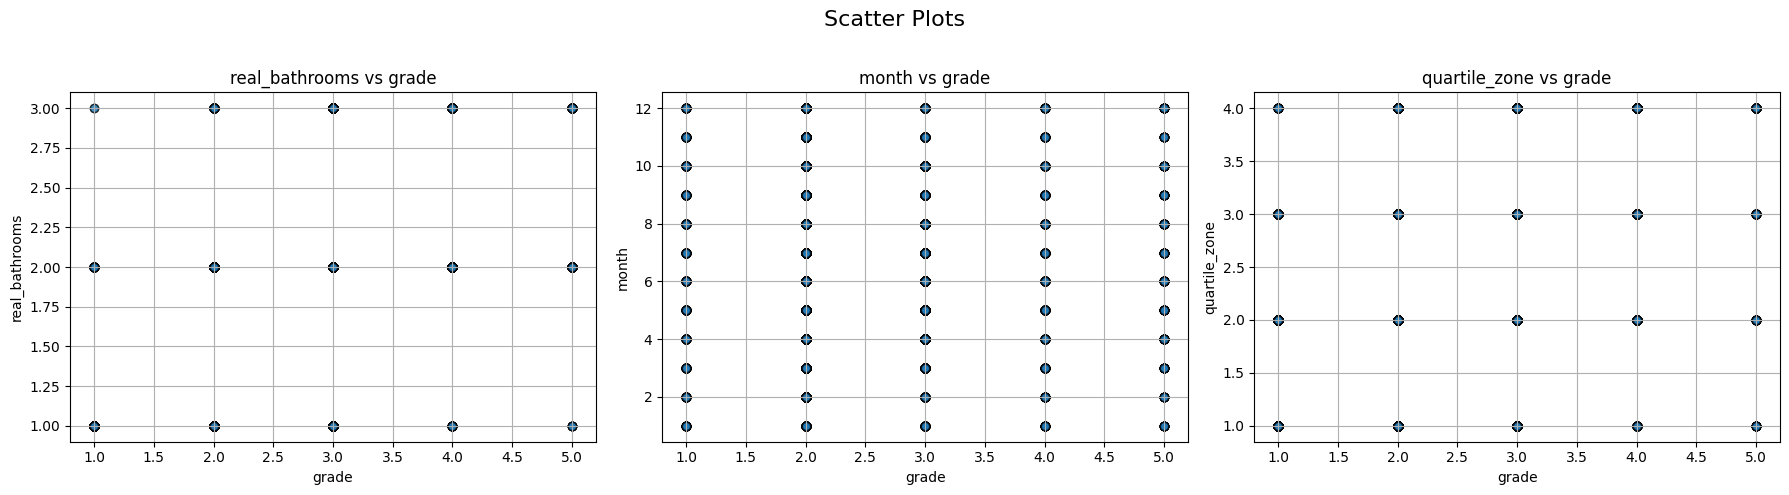

In [83]:
group2_pairs = pairs[12:15]  # next 3 pairs

fig, axes = plt.subplots(1, len(group2_pairs), figsize=(6*len(group2_pairs), 5))
if len(group2_pairs) == 1:
    axes = [axes]

for ax, (x_col, y_col) in zip(axes, group2_pairs):
    ax.scatter(df[x_col], df[y_col], alpha=0.6, edgecolor='black')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col} vs {x_col}")
    ax.grid(True)

plt.suptitle("Scatter Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Row 5

1. real_bathrooms vs grade:
Slight upward trend; homes with more bathrooms tend to have higher grades, though data is limited.

2. month vs grade:
No visible pattern; grade doesn’t depend on the sale month.

3. quartile_zone vs grade:
Grade seems evenly distributed across quartile zones, suggesting minimal connection.

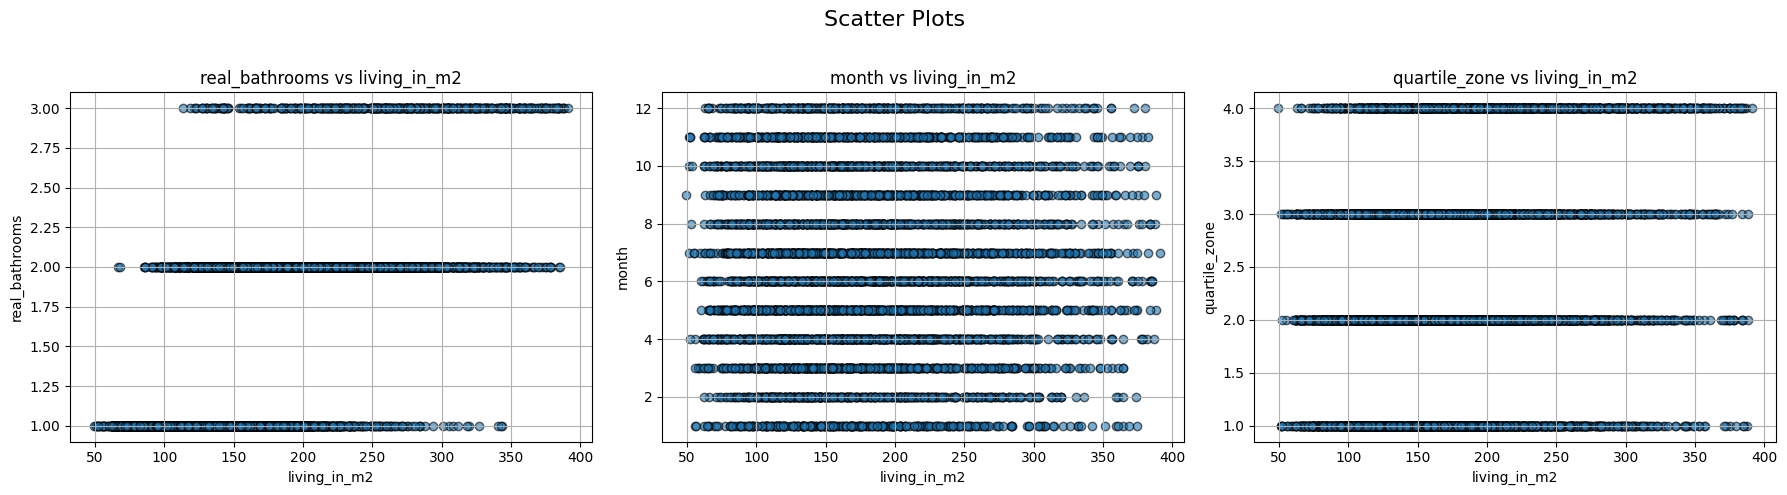

In [84]:
group2_pairs = pairs[15:18]  # next 3 pairs

fig, axes = plt.subplots(1, len(group2_pairs), figsize=(6*len(group2_pairs), 5))
if len(group2_pairs) == 1:
    axes = [axes]

for ax, (x_col, y_col) in zip(axes, group2_pairs):
    ax.scatter(df[x_col], df[y_col], alpha=0.6, edgecolor='black')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col} vs {x_col}")
    ax.grid(True)

plt.suptitle("Scatter Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


ROW 6

1. real_bathrooms vs living_in_m2:
Mild positive relationship—homes with more bathrooms tend to have slightly larger living spaces.

2. month vs living_in_m2:
No visible trend—property size doesn’t vary by sale month.

3. quartile_zone vs living_in_m2:
Slight tendency for higher quartile zones to include larger living spaces, but overlap exists

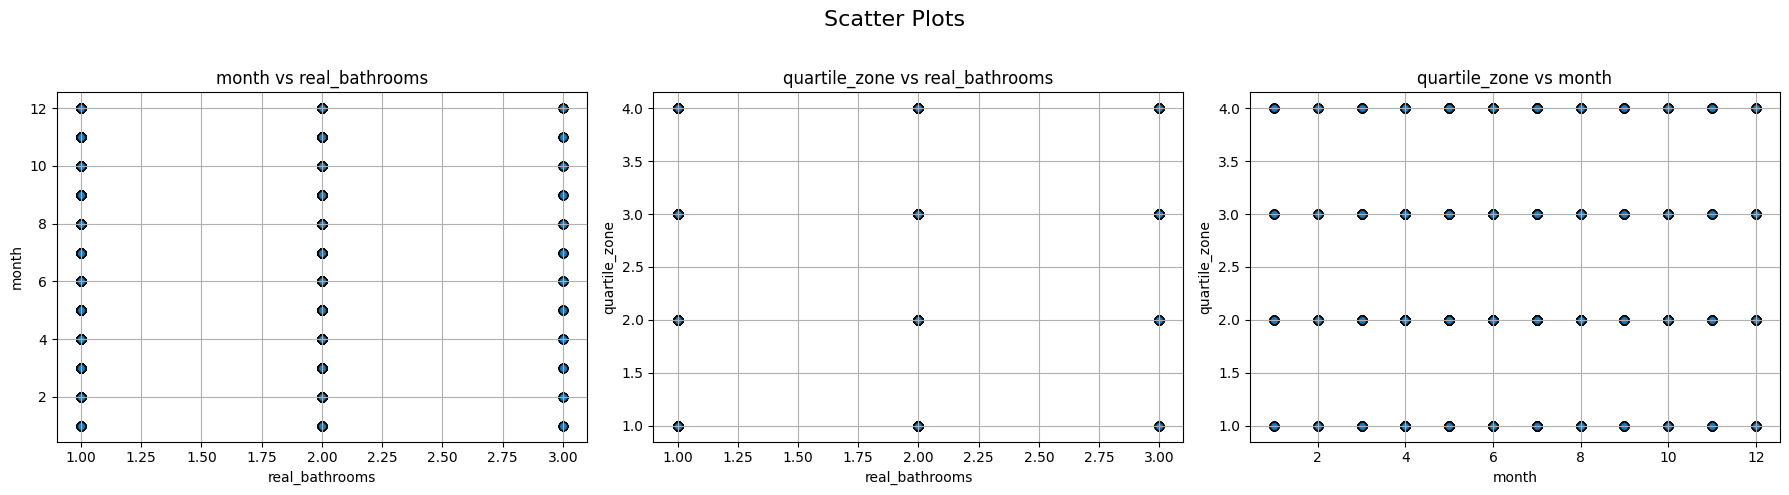

In [85]:
group2_pairs = pairs[18:21]  # next 3 pairs

fig, axes = plt.subplots(1, len(group2_pairs), figsize=(6*len(group2_pairs), 5))
if len(group2_pairs) == 1:
    axes = [axes]

for ax, (x_col, y_col) in zip(axes, group2_pairs):
    ax.scatter(df[x_col], df[y_col], alpha=0.6, edgecolor='black')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col} vs {x_col}")
    ax.grid(True)

plt.suptitle("Scatter Plots", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


ROW 7

1. month vs real_bathrooms:
No trend—number of bathrooms doesn’t vary by month.

2. quartile_zone vs real_bathrooms:
Bathroom counts appear consistent across quartile zones—no clear pattern.

3. quartile_zone vs month:
Quartile zones are evenly represented throughout months—no seasonality effect.

# Data Analysis: Visualization (Bar & Class Label)

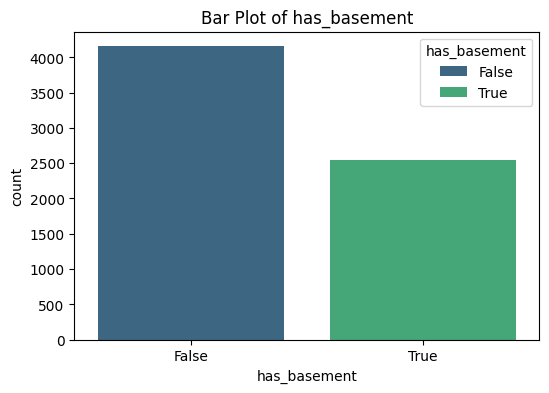

In [86]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="has_basement", hue="has_basement", palette="viridis")
plt.title("Bar Plot of has_basement")
plt.show()


Most of the houses don’t have a basement, and only a few do.  
This imbalance can make the model biased toward houses without basements.

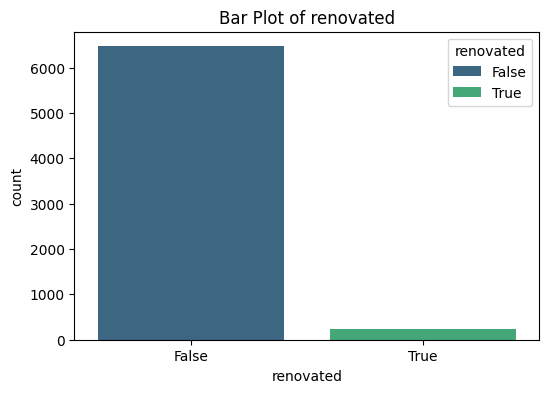

In [87]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="renovated", hue="renovated", palette="viridis")
plt.title("Bar Plot of renovated")
plt.show()


Almost all houses are not renovated, very few are.
The model might not learn much from this feature because there is little variation.

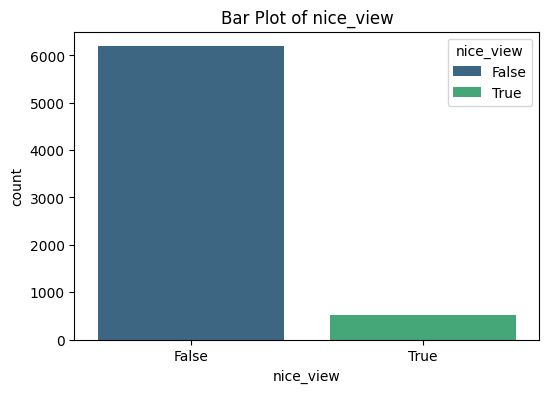

In [88]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="nice_view", hue="nice_view", palette="viridis")
plt.title("Bar Plot of nice_view")
plt.show()


Very few houses have a nice view.  
The model could ignore this small group and focus on the majority.


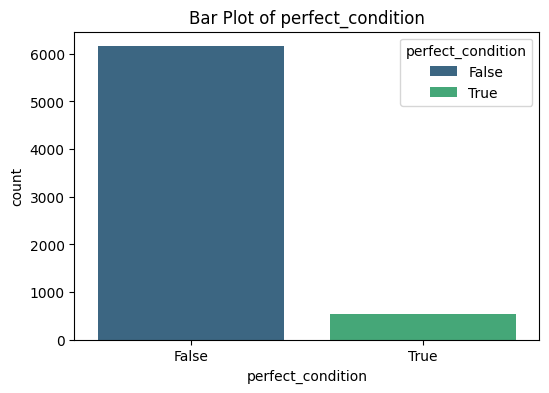

In [89]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="perfect_condition", hue="perfect_condition", palette="viridis")
plt.title("Bar Plot of perfect_condition")
plt.show()


Only a small number of houses are in perfect condition.
The model may not predict this group well since it doesn’t see many examples.

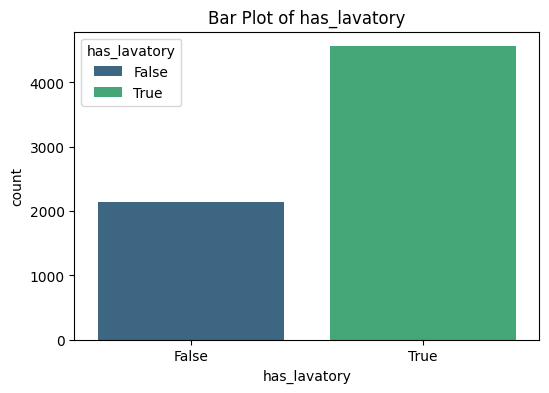

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="has_lavatory", hue="has_lavatory", palette="viridis")
plt.title("Bar Plot of has_lavatory")
plt.show()


Most of the houses have a lavatory, only a few don’t.
The model may always assume houses have a lavatory and ignore the minority.

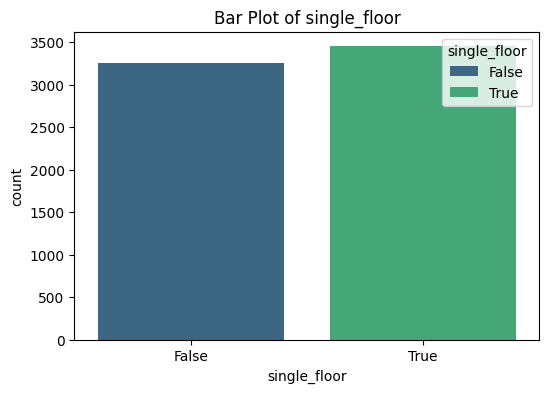

In [91]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="single_floor", hue="single_floor", palette="viridis")
plt.title("Bar Plot of single_floor")
plt.show()


Most houses are not single-floor, fewer are single-floor.
This imbalance may make the model biased toward multi-floor houses.




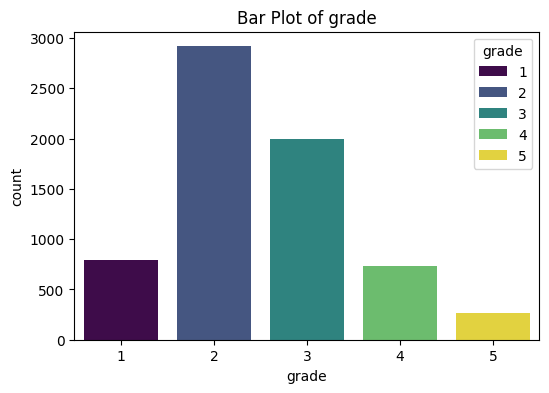

In [92]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="grade", hue="grade", palette="viridis")
plt.title("Bar Plot of grade")
plt.show()


Most houses are in the lower grades (1–3), high grades are rare.
The model may struggle to learn about high grades since there are not many examples.

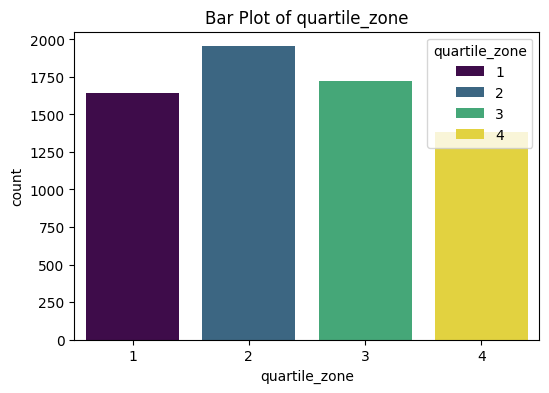

In [93]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="quartile_zone", hue="quartile_zone", palette="viridis")
plt.title("Bar Plot of quartile_zone")
plt.show()


Some zones have more houses than others.
The model could perform better on the bigger zones and worse on the smaller ones.

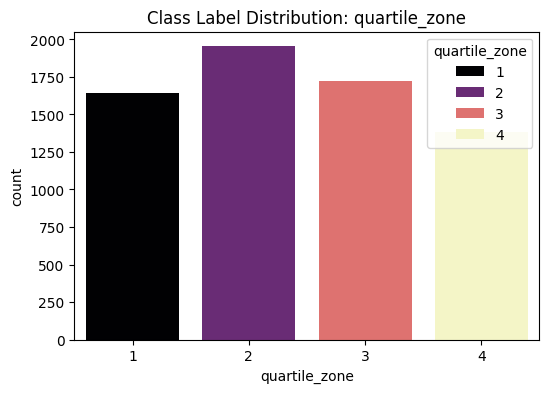

In [94]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="quartile_zone", hue="quartile_zone", palette="magma")
plt.title("Class Label Distribution: quartile_zone")
plt.show()


The class labels are not balanced, some zones dominate the dataset.
This can cause the model to predict the majority class most of the time.

### Summary
The plots show that many features in the dataset are not balanced.  
This imbalance can make the model biased toward the majority classes and ignore the minority ones.  
Therefore, preprocessing is important to handle the imbalance and allow the model to learn more fairly from all classes.


# Data Analysis: Missing Values & Outliers

In [95]:
missing_count = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100

print("Missing values count:\n", missing_count)
print("\nMissing values percentage:\n", missing_percentage)

Missing values count:
 date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64

Missing values percentage:
 date                 0.0
price                0.0
bedrooms             0.0
grade                0.0
has_basement         0.0
living_in_m2         0.0
renovated            0.0
nice_view            0.0
perfect_condition    0.0
real_bathrooms       0.0
has_lavatory         0.0
single_floor         0.0
month                0.0
quartile_zone        0.0
dtype: float64


The analysis of missing values shows that the dataset contains no missing
values. This indicates that the dataset is complete, and no imputation is required for this step of preprocessing.

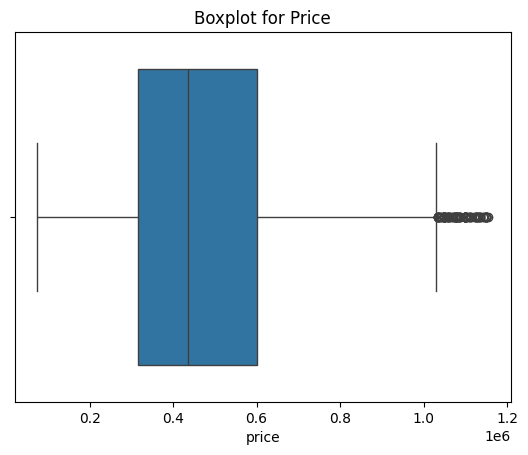

In [96]:
sns.boxplot(x=df['price'])
plt.title("Boxplot for Price")
plt.show()

The boxplot for price shows that most houses are priced between approximately 200,000 and 600,000, with the median around 400,000. However, several extreme outliers appear above 1,000,000, representing unusually expensive houses. These outliers may distort the dataset and require handling during preprocessing.

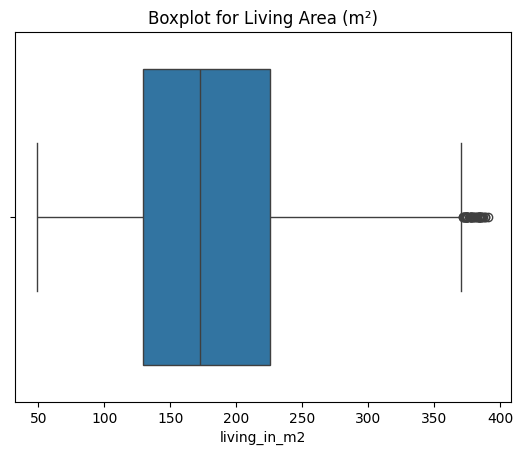

In [97]:
sns.boxplot(x=df['living_in_m2'])
plt.title("Boxplot for Living Area (m²)")
plt.show()


The boxplot for living area (m²) shows that most houses have a typical living space between approximately 100 and 250 m², with the median around 180 m². However, there are some extreme outliers above 350 m², representing unusually large houses that may affect the analysis.These outliers may distort the dataset and require handling during preprocessing.

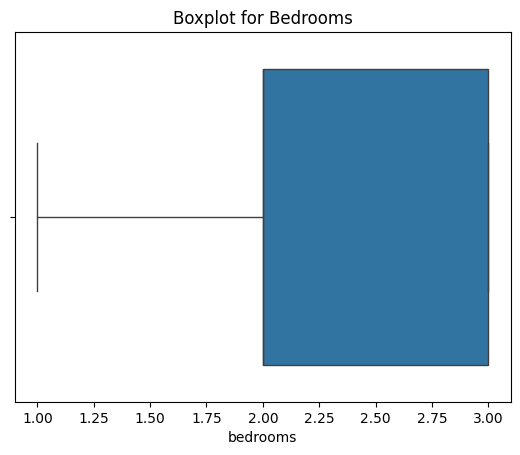

In [98]:
sns.boxplot(x=df['bedrooms'])
plt.title("Boxplot for Bedrooms")
plt.show()


The boxplot for bedrooms shows that most houses have between 2 and 3 bedrooms, with the median at 2. There are no significant extreme outliers, which indicates that the number of bedrooms is consistent across the dataset.

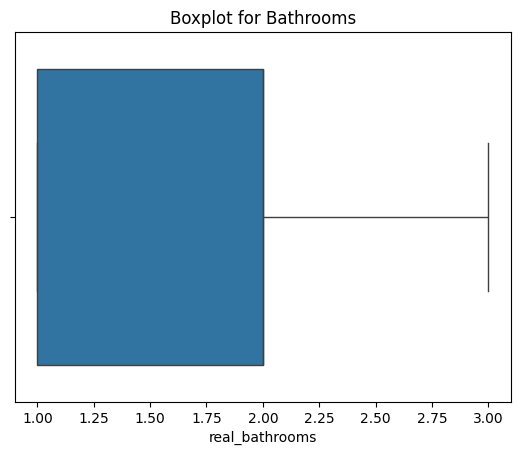

In [99]:
sns.boxplot(x=df['real_bathrooms'])
plt.title("Boxplot for Bathrooms")
plt.show()


The boxplot for bathrooms shows that most houses have between 1 and 2 bathrooms, with the median around 2. The distribution is fairly consistent, and no extreme outliers are detected in this attribute.

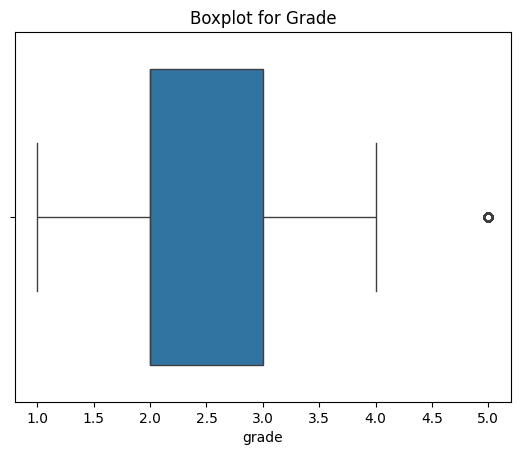

In [100]:
sns.boxplot(x=df['grade'])
plt.title("Boxplot for Grade")
plt.show()


The boxplot for grade shows that while the grading scale is limited between 1 and 5, the value 5 appears as an outlier due to most houses being concentrated in the middle range (around 2–3). However, this is a statistical outlier rather than a data error, since 5 is a valid grade within the defined scale.

**Conclusion**:

The analysis of missing values and outliers shows that the dataset is generally complete, with no missing entries detected. However, several numerical attributes such as price and living_in_m2 contain extreme outliers, while attributes such as bedrooms and real_bathrooms appear to be consistent without significant anomalies. In addition, the value 5 in grade is identified as a statistical outlier due to the data concentration in the middle range, though it remains a valid value within the defined scale. These findings indicate that preprocessing is necessary, particularly for handling outliers, in order to improve data quality and ensure accurate modeling.

# Data Preprocessing

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

print("Snapshot of Raw Dataset:")
print(df.head())

Snapshot of Raw Dataset:
         date     price  bedrooms  grade  has_basement  living_in_m2  \
0  2014-09-26  305000.0         2      1         False      76.18046   
1  2014-05-14  498000.0         3      2          True     210.88981   
2  2015-03-23  590000.0         2      4         False     262.91549   
3  2014-07-15  775000.0         3      3         False     159.79316   
4  2015-04-14  350000.0         2      1         False      92.90300   

   renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0      False      False               True               1         False   
1      False      False              False               2          True   
2      False      False              False               2          True   
3      False      False              False               1          True   
4      False      False              False               1          True   

   single_floor  month  quartile_zone  
0          True      9              2  
1    

In [102]:
# Standardization
numeric_features = ['price', 'living_in_m2', 'bedrooms', 'real_bathrooms']

std_scaler = StandardScaler()
df[numeric_features] = std_scaler.fit_transform(df[numeric_features])

Standardization was applied because numeric attributes such as price and living_in_m2 had very different scales.
Based on statistical summaries from data analysis, these differences could bias the model.
Using StandardScaler transformed these columns to a standard scale (mean = 0, std = 1), improving comparability between features.


In [103]:
# Feature Selection
X = df.drop('quartile_zone', axis=1)
y = df['quartile_zone']

X_numeric = X.select_dtypes(include=['int64', 'float64'])

best_features = SelectKBest(score_func=f_classif, k=5)
fit = best_features.fit(X_numeric, y)

feature_scores = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Score': fit.scores_
}).sort_values(by='Score', ascending=False)

print("Top 5 Selected Features:")
print(feature_scores.head())

Top 5 Selected Features:
          Feature        Score
0           price  1855.986341
2           grade   270.184182
3    living_in_m2   126.564028
4  real_bathrooms    43.760031
1        bedrooms    26.687688


Feature selection was applied to keep only the most relevant attributes for predicting quartile_zone.
From data analysis visualizations (scatter and bar plots), we noticed that some features had stronger relationships with the target variable.
SelectKBest with ANOVA F-test identified the top 5 features, reducing data complexity and improving model quality.


In [104]:
# Noise Removal
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


Outlier removal was performed using the Interquartile Range (IQR) method.
Boxplot analysis in the previous phase showed extreme values in numeric columns such as price and living_in_m2.
Removing these outliers reduced noise and improved dataset stability and reliability.


In [105]:
# Snapshot of Preprocessed Dataset:
print("Snapshot After Preprocessing:")
print(df.head())

Snapshot After Preprocessing:
         date     price  bedrooms  grade  has_basement  living_in_m2  \
0  2014-09-26 -0.819164 -0.347184      1         False     -1.540812   
1  2014-05-14  0.108578  1.096722      2          True      0.431209   
2  2015-03-23  0.550818 -0.347184      4         False      1.192817   
3  2014-07-15  1.440104  1.096722      3         False     -0.316799   
4  2015-04-14 -0.602851 -0.347184      1         False     -1.296009   

   renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0      False      False               True       -1.060632         False   
1      False      False              False        0.534124          True   
2      False      False              False        0.534124          True   
3      False      False              False       -1.060632          True   
4      False      False              False       -1.060632          True   

   single_floor  month  quartile_zone  
0          True      9              2  


After preprocessing, the dataset became cleaner, more consistent, and reliable. Standardization balanced numeric values, feature selection removed irrelevant attributes, and outlier removal eliminated extreme values. These steps improved the overall quality and integrity of the data.

In [106]:
# Save the preprocessed dataset
df.to_csv("Preprocessed_dataset.csv", index=False)

print("Preprocessed dataset saved as 'Preprocessed_dataset.csv'")


Preprocessed dataset saved as 'Preprocessed_dataset.csv'
